In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
# "override" plt  
sns.set()

### Import data
 **ID** - id  
 **Sex** - 0:male,1:female  
 **Marital status** - 0:single, 1:non-single  
 **Age** - 18-76   
 **Education** 0:other, 1:high-school, 2:university, 3:graduate school  
 **Income** - dollars  
 **Occupation** - 0:unemployed, 1:skilled, 2:highly qualified  
 **Settlement size** - 0:small city, 1:mid-city, 2:big-city  

In [2]:
df_segmentation = pd.read_csv('segmentation_data.csv', index_col=0)

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Dealing with None

Missing values precentage per each feature

In [5]:
num_of_nulls = df_segmentation.isnull().sum()


Precentage

In [6]:
num_of_nulls/df_segmentation.shape[0] * 100

Sex                0.0
Marital status     0.0
Age                0.0
Education          0.0
Income             0.0
Occupation         0.0
Settlement size    0.0
dtype: float64

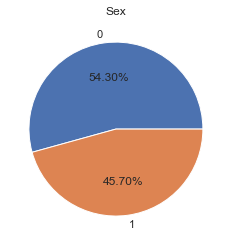

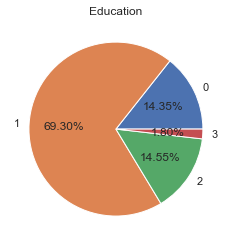

In [7]:
def plot_chart_pie(attribute):
    '''
    Plot pie chart of the given attribute
    :param attribute: given attribute
    :return: plot pie
    '''
    col = df_segmentation[attribute]
    np_col = col.to_numpy()

    # count number of occurrences of each value
    num_of_occur = np.bincount(np_col)

    frequency = []
    lables = []
    for i, f in enumerate(num_of_occur):
        frequency.append(f)
        lables.append(i)


    plt.pie(frequency, labels=lables, autopct='%1.2f%%')
    plt.title(attribute)
    plt.show()

plot_chart_pie('Sex')    
plot_chart_pie('Education')

### Visualize
Visualize data points


In [8]:
def visualize(attribute1, attribute2, attribute3 = None):
    '''
    Plot data points
    :param attribute1: attribute one
    :param attribute2: attribute two
    :param attribute2: attribute 
    :return: plot data points(optional)
    '''
    fig = plt.figure(figsize=(12, 9))
    if attribute3 is None:
        plt.scatter(df_segmentation[attribute1], df_segmentation[attribute2])
    else:
        td_fig = Axes3D(fig)
        plt.scatter(df_segmentation[attribute1], df_segmentation[attribute2], df_segmentation[attribute3])
        
    
    plt.xlabel(attribute1)
    plt.ylabel(attribute2)
    plt.show()
    

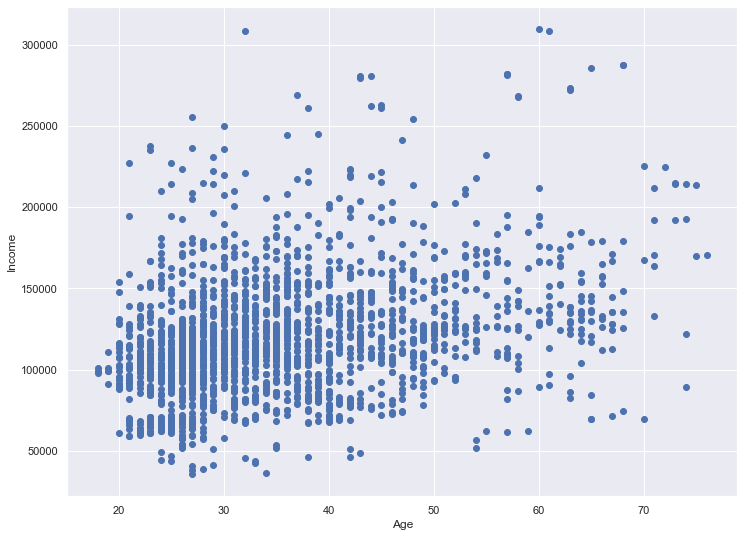

In [9]:
visualize('Age', 'Income')

In [10]:
#visualize('Age', 'Education', 'Sex')

### One hot encoder

In [11]:
print(df_segmentation.shape)

### Creating dummy features from categorical features ##
def turn_to_dummy(df, cols):
    for col in cols:
        dummy_df = pd.get_dummies(df[col], prefix=col, dummy_na=False)
        df = df.drop(col, 1)
        df = pd.concat([df, dummy_df], axis=1)
    return df

df_segmentation = turn_to_dummy(df_segmentation, ['Education','Occupation','Settlement size'])

print(df_segmentation.shape)
#col_names = df_segmentation.columns


(2000, 7)
(2000, 14)


### Correlation Estimate
**Correlation matrix**

remove features with high/low correlation (greater than 0.85)

In [12]:
df_segmentation.corr()

,Sex,Marital status,Age,Income,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2
Sex,1.000000,0.566511,-0.182885,-0.195146,-0.283893,0.140571,0.062662,0.094732,0.156929,-0.033621,-0.169042,0.287135,-0.096107,-0.238248
Marital status,0.566511,1.000000,-0.213178,-0.073528,-0.406464,0.166619,0.140440,0.121296,-0.013512,0.063197,-0.075416,0.075929,0.006526,-0.096598
Age,-0.182885,-0.213178,1.000000,0.340610,-0.296997,-0.329268,0.634124,0.243714,-0.031507,-0.080292,0.163807,-0.136056,0.087126,0.069148
Income,-0.195146,-0.073528,0.340610,1.000000,-0.063238,-0.180876,0.264829,0.091909,-0.537917,0.132896,0.553103,-0.516414,0.264333,0.332261
Education_0,-0.283893,-0.406464,-0.296997,-0.063238,1.000000,-0.614978,-0.168903,-0.055417,0.003571,0.023783,-0.040472,-0.016892,-0.035460,0.057261
Education_1,0.140571,0.166619,-0.329268,-0.180876,-0.614978,1.000000,-0.619973,-0.203413,-0.006221,0.053876,-0.071694,0.079404,-0.007289,-0.086174
Education_2,0.062662,0.140440,0.634124,0.264829,-0.168903,-0.619973,1.000000,-0.055867,0.011886,-0.082608,0.106650,-0.076293,0.050502,0.037043
Education_3,0.094732,0.121296,0.243714,0.091909,-0.055417,-0.203413,-0.055867,1.000000,-0.019357,-0.030538,0.072601,-0.028599,-0.015145,0.049728
Occupation_0,0.156929,-0.013512,-0.031507,-0.537917,0.003571,-0.006221,0.011886,-0.019357,1.000000,-0.762260,-0.259545,0.589103,-0.350718,-0.327302
Occupation_1,-0.033621,0.063197,-0.080292,0.132896,0.023783,0.053876,-0.082608,-0.030538,-0.762260,1.000000,-0.427248,-0.328883,0.258434,0.116842


In [13]:
col_names = df_segmentation.columns = ['Sex', 'Marital status', 'Age', 'Income', 'Education:other', 'High-school', 'University', 'Graduate school', 'Unemployed', 'Skilled','Highly qualified','Small city','Mid-city','Big-city']
df_segmentation.columns =col_names

In [14]:
df_segmentation.corr()

,Sex,Marital status,Age,Income,Education:other,High-school,University,Graduate school,Unemployed,Skilled,Highly qualified,Small city,Mid-city,Big-city
Sex,1.000000,0.566511,-0.182885,-0.195146,-0.283893,0.140571,0.062662,0.094732,0.156929,-0.033621,-0.169042,0.287135,-0.096107,-0.238248
Marital status,0.566511,1.000000,-0.213178,-0.073528,-0.406464,0.166619,0.140440,0.121296,-0.013512,0.063197,-0.075416,0.075929,0.006526,-0.096598
Age,-0.182885,-0.213178,1.000000,0.340610,-0.296997,-0.329268,0.634124,0.243714,-0.031507,-0.080292,0.163807,-0.136056,0.087126,0.069148
Income,-0.195146,-0.073528,0.340610,1.000000,-0.063238,-0.180876,0.264829,0.091909,-0.537917,0.132896,0.553103,-0.516414,0.264333,0.332261
Education:other,-0.283893,-0.406464,-0.296997,-0.063238,1.000000,-0.614978,-0.168903,-0.055417,0.003571,0.023783,-0.040472,-0.016892,-0.035460,0.057261
High-school,0.140571,0.166619,-0.329268,-0.180876,-0.614978,1.000000,-0.619973,-0.203413,-0.006221,0.053876,-0.071694,0.079404,-0.007289,-0.086174
University,0.062662,0.140440,0.634124,0.264829,-0.168903,-0.619973,1.000000,-0.055867,0.011886,-0.082608,0.106650,-0.076293,0.050502,0.037043
Graduate school,0.094732,0.121296,0.243714,0.091909,-0.055417,-0.203413,-0.055867,1.000000,-0.019357,-0.030538,0.072601,-0.028599,-0.015145,0.049728
Unemployed,0.156929,-0.013512,-0.031507,-0.537917,0.003571,-0.006221,0.011886,-0.019357,1.000000,-0.762260,-0.259545,0.589103,-0.350718,-0.327302
Skilled,-0.033621,0.063197,-0.080292,0.132896,0.023783,0.053876,-0.082608,-0.030538,-0.762260,1.000000,-0.427248,-0.328883,0.258434,0.116842


### Correlation Heatmap
**Blue** - high correlation  
**Red** - low correlation  

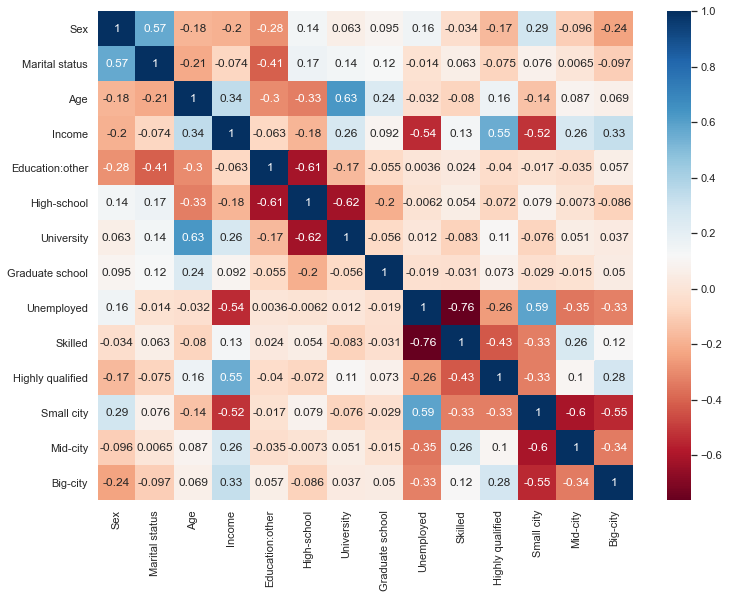

In [15]:
plt.figure(figsize=(12, 9))
s = sns.heatmap(df_segmentation.corr(), cmap='RdBu', annot=True)

## Standardizing data

In [16]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)


In [17]:
segmentation_std = pd.DataFrame(segmentation_std, columns=col_names)


In [18]:
segmentation_std.head()

,Sex,Marital status,Age,Income,Education:other,High-school,University,Graduate school,Unemployed,Skilled,Highly qualified,Small city,Mid-city,Big-city
0,-0.917399,-0.993024,2.653614,0.097524,-0.409319,-1.502441,2.423397,-0.135388,-0.680483,0.892718,-0.381412,-0.989060,-0.611250,1.811810
1,1.090038,1.007025,-1.187132,0.782654,-0.409319,0.665584,-0.412644,-0.135388,-0.680483,0.892718,-0.381412,-0.989060,-0.611250,1.811810
2,-0.917399,-0.993024,1.117316,-0.833202,-0.409319,0.665584,-0.412644,-0.135388,1.469543,-1.120175,-0.381412,1.011061,-0.611250,-0.551934
3,-0.917399,-0.993024,0.775916,1.328386,-0.409319,0.665584,-0.412644,-0.135388,-0.680483,0.892718,-0.381412,-0.989060,1.635992,-0.551934
4,-0.917399,-0.993024,1.458716,0.736932,-0.409319,0.665584,-0.412644,-0.135388,-0.680483,0.892718,-0.381412,-0.989060,1.635992,-0.551934


## K-means

Choose the Number of Clusters (WCSS) - Distance between points in a cluster

In [19]:
wcss = []
for i in range(1, 11):
    # k-means++ algo find the best statring points
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Within-cluster sum of squares')

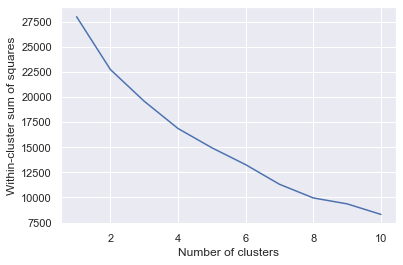

In [20]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')

In [21]:
kmeans = KMeans(n_clusters = 5, init='k-means++')

In [22]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=5)

In [23]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment k-means'] = kmeans.labels_
df_segm_kmeans

,Sex,Marital status,Age,Income,Education:other,High-school,University,Graduate school,Unemployed,Skilled,Highly qualified,Small city,Mid-city,Big-city,Segment k-means
ID,,,,,,,,,,,,,,,
100000001,0,0,67,124670,0,0,1,0,0,1,0,0,0,1,3
100000002,1,1,22,150773,0,1,0,0,0,1,0,0,0,1,1
100000003,0,0,49,89210,0,1,0,0,1,0,0,1,0,0,0
100000004,0,0,45,171565,0,1,0,0,0,1,0,0,1,0,1
100000005,0,0,53,149031,0,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,123525,0,1,0,0,1,0,0,1,0,0,0
100001997,1,1,27,117744,0,1,0,0,0,1,0,1,0,0,0
100001998,0,0,31,86400,1,0,0,0,1,0,0,1,0,0,4


In [24]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment k-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Income,Education:other,High-school,University,Graduate school,Unemployed,Skilled,Highly qualified,Small city,Mid-city,Big-city
Segment k-means,,,,,,,,,,,,,,
0,0.717593,0.660494,31.391975,97183.592593,0.000000,1.000000,0.000000,0.000000,0.629630,0.370370,0.000000,0.996914,0.000000,0.003086
1,0.352740,0.488014,34.743151,125447.964041,0.000000,1.000000,0.000000,0.000000,0.047945,0.952055,0.000000,0.113014,0.530822,0.356164
2,0.229839,0.395161,40.741935,176899.375000,0.096774,0.620968,0.250000,0.032258,0.000000,0.000000,1.000000,0.052419,0.391129,0.556452
3,0.599222,0.708171,54.186770,128836.431907,0.000000,0.000000,0.891051,0.108949,0.408560,0.579767,0.011673,0.498054,0.291829,0.210117
4,0.121673,0.000000,27.209125,109088.406844,1.000000,0.000000,0.000000,0.000000,0.349810,0.638783,0.011407,0.517110,0.235741,0.247148


In [25]:
df_segm_kmeans[['Segment k-means', 'Age']].groupby(['Segment k-means']).count()

,Age
Segment k-means,
0,648
1,584
2,248
3,257
4,263


In [26]:
# number of observation
df_segm_analysis['Observation'] = df_segm_kmeans[['Segment k-means', 'Age']].groupby(['Segment k-means']).count()
df_segm_analysis['%'] = df_segm_analysis['Observation'] / df_segm_analysis['Observation'].sum() * 100
df_segm_analysis

,Sex,Marital status,Age,Income,Education:other,High-school,University,Graduate school,Unemployed,Skilled,Highly qualified,Small city,Mid-city,Big-city,Observation,%
Segment k-means,,,,,,,,,,,,,,,,
0,0.717593,0.660494,31.391975,97183.592593,0.000000,1.000000,0.000000,0.000000,0.629630,0.370370,0.000000,0.996914,0.000000,0.003086,648,32.40
1,0.352740,0.488014,34.743151,125447.964041,0.000000,1.000000,0.000000,0.000000,0.047945,0.952055,0.000000,0.113014,0.530822,0.356164,584,29.20
2,0.229839,0.395161,40.741935,176899.375000,0.096774,0.620968,0.250000,0.032258,0.000000,0.000000,1.000000,0.052419,0.391129,0.556452,248,12.40
3,0.599222,0.708171,54.186770,128836.431907,0.000000,0.000000,0.891051,0.108949,0.408560,0.579767,0.011673,0.498054,0.291829,0.210117,257,12.85
4,0.121673,0.000000,27.209125,109088.406844,1.000000,0.000000,0.000000,0.000000,0.349810,0.638783,0.011407,0.517110,0.235741,0.247148,263,13.15
